# Pattern matching analysis
### Author: Krzysztof Chmielewski
In this section i will compare few pattern finding algorithms. We need to import those algorithms from `utils` directory and also import suffix structures.

In [1]:
import time, psutil, os, sys
import pandas as pd

# Importing suffix structures
from ukkonen import SuffixTree
from suffix_array import SuffixArray

# Importing pattern finding algoritms from previous labs
from utils.naive_pattern_matching import naive_pattern_match
from utils.kmp_algorithm import kmp_pattern_match
from utils.boyer_moore_algorithm import boyer_moore_pattern_match
from utils.rabin_karp_algorithm import rabin_karp_pattern_match
from utils.aho_corasick_algorithm import AhoCorasick

In [2]:
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024  # in KB

In [3]:
def compare_pattern_matching_algorithms(text: str, pattern: str) -> dict:
    """
    Compare the performance of different pattern matching algorithms.
 
    Args:
        text: The text to search in
        pattern: The pattern to search for
 
    Returns:
        A dictionary containing the results of each algorithm:
        - Execution time in milliseconds
        - Memory usage in kilobytes
        - Number of character comparisons made
        - Positions where the pattern was found
    """
    prior_mem = get_memory_usage()

    # Implement algorithm comparisons
    # For each algorithm:
    #   1. Measure execution time
    #   2. Measure memory usage
    #   3. Count character comparisons
    #   4. Find pattern positions

    # Measuring time and memory usage

    # Naive algorithm time exec and mem usage
    start_time = time.time()
    naive_result, naive_compares = naive_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_naive = get_memory_usage()
    naive_time_exec = (end_time - start_time) * 1000
    naive_mem_usage = mem_after_naive - prior_mem

    # Suffix array time exec and mem usage
    sa = SuffixArray(text)
    start_time = time.time()
    sa.count_compares = True
    sa_result, sa_compares = sa.find_pattern(pattern)
    end_time = time.time()
    mem_after_sa = get_memory_usage()
    sarray_time_exec = (end_time - start_time) * 1000
    sarray_mem_usage = mem_after_sa - naive_mem_usage

    # Suffix tree time exec and mem usage
    st = SuffixTree(text)
    start_time = time.time()
    st.count_compares = True
    st_result, st_compares = st.find_pattern(pattern)
    end_time = time.time()
    mem_after_st = get_memory_usage()
    stree_time_exec = (end_time - start_time) * 1000
    stree_mem_usage = mem_after_st - mem_after_sa

    # KMP time exec and mem usage
    start_time = time.time()
    kmp_result, kmp_compares = kmp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_kmp = get_memory_usage()
    kmp_time_exec = (end_time - start_time) * 1000
    kmp_mem_usage = mem_after_kmp - mem_after_st
    
    # Boyer-Moore time exec and mem usage
    start_time = time.time()
    bm_result, bm_compares = boyer_moore_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_bm = get_memory_usage()
    bm_time_exec = (end_time - start_time) * 1000
    bm_mem_usage = mem_after_bm - mem_after_kmp

    # Rabin-Karp time exec and mem usage
    start_time = time.time()
    rk_result, rk_compares = rabin_karp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_rk = get_memory_usage()
    rk_time_exec = (end_time - start_time) * 1000
    rk_mem_usage = mem_after_rk - mem_after_bm

    # Aho-Corasick time exec and mem usage
    start_time = time.time()
    ac = AhoCorasick([pattern])
    ac_result, ac_compares = ac.search(text)
    end_time = time.time()
    mem_after_ac = get_memory_usage()
    ac_time_exec = (end_time - start_time) * 1000
    ac_mem_usage = mem_after_ac - mem_after_rk

    sa_result.sort()
    st_result.sort()
    kmp_result.sort()
    bm_result.sort()
    rk_result.sort()
    ac_result = [index for index, _ in ac_result]
    ac_result.sort()

    return {
        "Naive": {
            "execution_time_ms": naive_time_exec,
            "memory_usage_kb": naive_mem_usage,
            "compares": naive_compares,
            "results": naive_result
        },
        "Suffix array": {
            "execution_time_ms": sarray_time_exec,
            "memory_usage_kb": sarray_mem_usage,
            "compares": sa_compares,
            "results": sa_result
        },
        "Suffix tree": {
            "execution_time_ms": stree_time_exec,
            "memory_usage_kb": stree_mem_usage,
            "compares": st_compares,
            "results": st_result
        },
        "Knuth-Morris-Pratt": {
            "execution_time_ms": kmp_time_exec,
            "memory_usage_kb": kmp_mem_usage,
            "compares": kmp_compares,
            "results": kmp_result
        },
        "Boyer-Moore": {
            "execution_time_ms": bm_time_exec,
            "memory_usage_kb": bm_mem_usage,
            "compares": bm_compares,
            "results": bm_result
        },
        "Rabin-Karp": {
            "execution_time_ms": rk_time_exec,
            "memory_usage_kb": rk_mem_usage,
            "compares": rk_compares,
            "results": rk_result
        },
        "Aho-Corasick": {
            "execution_time_ms": ac_time_exec,
            "memory_usage_kb": ac_mem_usage,
            "compares": ac_compares,
            "results": ac_result
        }
    }

# Short text comparison

In [4]:
with open('text_samples/short.txt', 'r') as file:
    short_text = file.read()
patterns_for_short = ["ita", "Lorem", "etur adipLorema", "consectetur adipLorema elit, s", "LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i"]
print("Length of text: ", len(short_text))
for p in patterns_for_short:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100
Pattern: ita | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: etur adipLorema | [LENGTH]: 15
Pattern: consectetur adipLorema elit, s | [LENGTH]: 30
Pattern: LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i | [LENGTH]: 80


## Example of pattern matching results

In [5]:
d1 = compare_pattern_matching_algorithms(short_text, patterns_for_short[0])
d1_df = pd.DataFrame(d1)
d1_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.106335,0.039577,0.025511,0.078678,0.068426,0.090599,0.11611
memory_usage_kb,0.0,108708.0,0.0,0.0,0.0,0.0,0.0
compares,108,168,4,108,37,0,198
results,[],[],[],[],[],[],[]


# Medium text comparison

In [6]:
with open('text_samples/medium.txt', 'r') as file:
    medium_text = file.read()
patterns_for_medium = ["add", "Lorem", "Maecenas tempus", "natoque penatibus et magnis di", "enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m"]
print("Length of text: ",len(medium_text))
for p in patterns_for_medium:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  1000
Pattern: add | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: Maecenas tempus | [LENGTH]: 15
Pattern: natoque penatibus et magnis di | [LENGTH]: 30
Pattern: enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m | [LENGTH]: 80


## Example of pattern matching results

In [7]:
d2 = compare_pattern_matching_algorithms(medium_text, patterns_for_medium[0])
d2_df = pd.DataFrame(d2)
d2_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,1.111269,0.165939,0.019073,0.465631,0.356436,0.673056,0.315428
memory_usage_kb,0.0,109636.0,256.0,0.0,0.0,0.0,0.0
compares,1058,684,4,1058,353,0,1998
results,[],[],[],[],[],[],[]


# Long text comparison

In [8]:
with open('text_samples/long.txt', 'r') as file:
    long_text = file.read()

patterns_for_long = ["llu", "Lorem", "scelerisque qui", "Maecenas egestas arcu quis lig", "rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli"]
print("Length of text: ", len(long_text))
for p in patterns_for_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  10000
Pattern: llu | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: scelerisque qui | [LENGTH]: 15
Pattern: Maecenas egestas arcu quis lig | [LENGTH]: 30
Pattern: rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli | [LENGTH]: 80


## Example of pattern matching results

In [9]:
d3 = compare_pattern_matching_algorithms(long_text, patterns_for_long[0])
d3_df = pd.DataFrame(d3)
d3_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,18.03112,2.822876,0.02718,1.766682,1.452446,2.580643,1.211643
memory_usage_kb,0.0,159940.0,2944.0,0.0,0.0,0.0,0.0
compares,10597,17223,6,10455,3810,72,19952
results,"[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2..."


# Very long text comparison

In [10]:
with open('text_samples/verylong.txt', 'r') as file:
    very_long_text = file.read()

patterns_for_very_long = ["lla", "lorem", "volutpat molest", "uer turpis ut velit. Nulla sit", "Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla"]
print("Length of text: ", len(very_long_text))
for p in patterns_for_very_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100000
Pattern: lla | [LENGTH]: 3
Pattern: lorem | [LENGTH]: 5
Pattern: volutpat molest | [LENGTH]: 15
Pattern: uer turpis ut velit. Nulla sit | [LENGTH]: 30
Pattern: Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla | [LENGTH]: 80


## Example of pattern matching results

In [11]:
d4 = compare_pattern_matching_algorithms(very_long_text, patterns_for_very_long[0])
d4_df = pd.DataFrame(d4)
d4_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,39.677143,117.281199,0.307083,16.768217,13.79776,25.365353,11.606932
memory_usage_kb,0.0,5011652.0,46592.0,0.0,0.0,0.0,0.0
compares,105998,170532,6,104356,38499,1026,199316
results,"[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15..."


# Plotting results of different pattern matching algorithms

In [12]:
import matplotlib.pyplot as plt

text_list = [short_text, medium_text, long_text, very_long_text]
pattern_lists = [patterns_for_short, patterns_for_medium, patterns_for_long, patterns_for_very_long]

## Preparing data for plotting

In [13]:
dtime = dict()
dmem = dict()
dcomp = dict()
for text, patterns in zip(text_list, pattern_lists):
    n = len(text)
    for pattern in patterns:
        m = len(pattern)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, n, m)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, n, m)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, n, m)] = result[algorithm]["compares"]

### Time execution
First we contain data results in Pandas Series so that i will be more readable and easier to access for plotting, then we are able to plot each algorithm behaviour with given text and pattern of different lengths and see how they compare to each other.

In [14]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                          3           5           15  \
Algorithm          Text Length                                       
Aho-Corasick       100            0.032902    0.025272    0.037193   
                   1000           0.130415    0.118256    0.122786   
                   10000          1.181364    1.079798    1.177073   
                   100000        11.405468   11.244774   10.965109   
Boyer-Moore        100            0.025034    0.021219    0.017166   
                   1000           0.149488    0.105381    0.058174   
                   10000          1.408339    0.943184    0.449657   
                   100000        13.835192    9.439468    4.575014   
Knuth-Morris-Pratt 100            0.018358    0.018358    0.018597   
                   1000           0.165939    0.163078    0.161886   
                   10000          1.710653    1.663446    1.719952   
                   100000        16.838789   17.015219   16.603231   
Naive              100            0.048637    0.039101    0.037670   
                   1000           0.452757    0.402451    0.387192   
                   10000          3.869772    3.863335    4.097700   
                   100000        39.376974   41.675329   39.292097   
Rabin-Karp         100            0.036240    0.041485    0.030756   
                   1000           0.245810    0.259638    0.256538   
                   10000          2.553940    2.611637    2.506971   
                   100000        25.369406   25.326729   25.231838   
Suffix array       100            0.015259    0.007391    0.012398   
                   1000           0.058174    0.052452    0.050545   
                   10000          2.214909    0.859976    3.276348   
                   100000       119.558573  122.618437  211.821795   
Suffix tree        100            0.005484    0.006914    0.008583   
                   1000           0.005722    0.004768    0.005960   
                   10000          0.019550    0.013590    0.015259   
                   100000         0.349998    0.094414    0.031948   

Pattern Length                          30         80  
Algorithm          Text Length                         
Aho-Corasick       100            0.043631   0.074625  
                   1000           0.144720   0.179052  
                   10000          1.178026   1.236439  
                   100000        11.531115  10.792017  
Boyer-Moore        100            0.019550   0.029802  
                   1000           0.048876   0.048876  
                   10000          0.310898   0.225782  
                   100000         2.908707   1.890421  
Knuth-Morris-Pratt 100            0.018597   0.022888  
                   1000           0.173330   0.177145  
                   10000          1.652479   1.692533  
                   100000        17.075777  16.540766  
Naive              100            0.033855   0.028372  
                   1000           0.382900   0.383377  
                   10000          4.180431   3.884792  
                   100000        43.073416  41.400194  
Rabin-Karp         100            0.030756   0.028133  
                   1000           0.258446   0.250816  
                   10000          2.516508   2.510309  
                   100000        25.166988  25.145769  
Suffix array       100            0.009060   0.008106  
                   1000           0.156879   0.088215  
                   10000          0.911236   2.938271  
                   100000       200.306177  42.201042  
Suffix tree        100            0.008821   0.013590  
                   1000           0.010014   0.019789  
                   10000          0.020027   0.025988  
                   100000         0.031471   0.036001

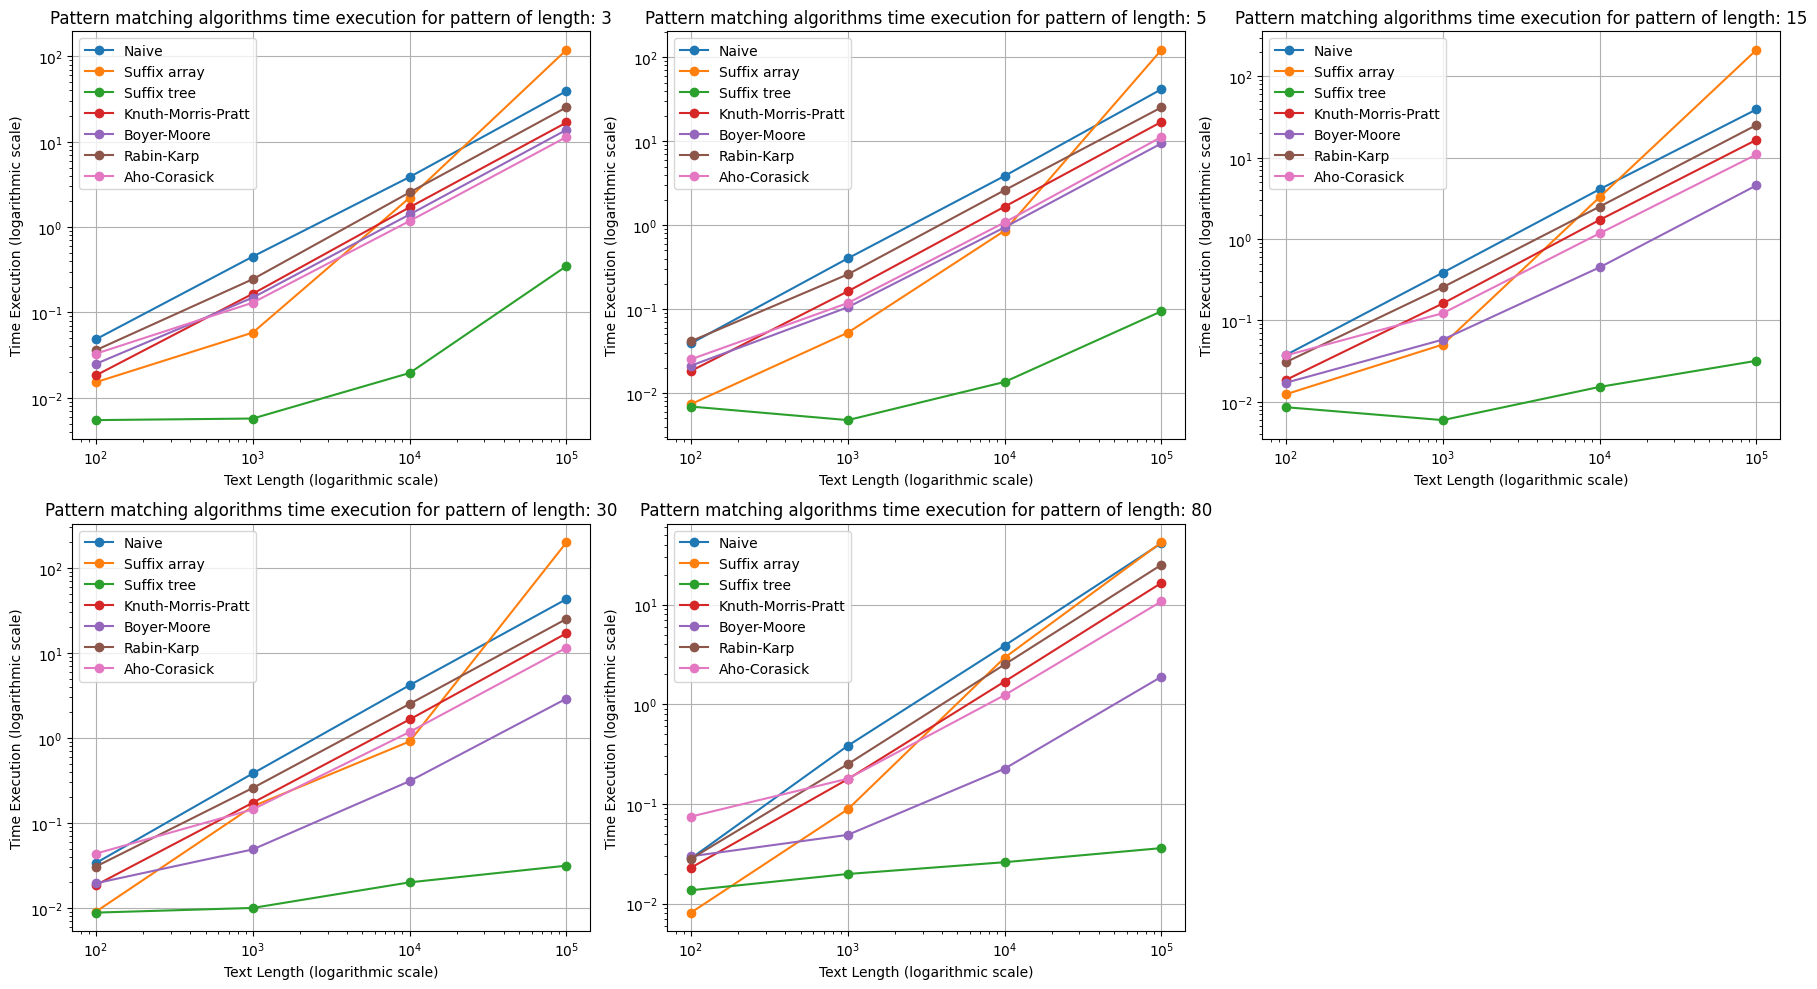

In [15]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage

In [16]:
df_mem = pd.Series(dmem)
df_mem.name = 'Memory usage'
df_mem.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_mem.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000           128.0        0.0        0.0        0.0   
Boyer-Moore        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Knuth-Morris-Pratt 100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Naive              100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Rabin-Karp         100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Suffix array       100          5063448.0  5063448.0  5063448.0  5063448.0   
                   1000         5063448.0  5063448.0  5063448.0  5063448.0   
                   10000        5063448.0  5063448.0  5063448.0  5063448.0   
                   100000       5070616.0  5085904.0  5088848.0  5090512.0   
Suffix tree        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000         11904.0        0.0        0.0      384.0   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Boyer-Moore        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Knuth-Morris-Pratt 100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Naive              100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Rabin-Karp         100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Suffix array       100          5063448.0  
                   1000         5063448.0  
                   10000        5063448.0  
                   100000       5090896.0  
Suffix tree        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0

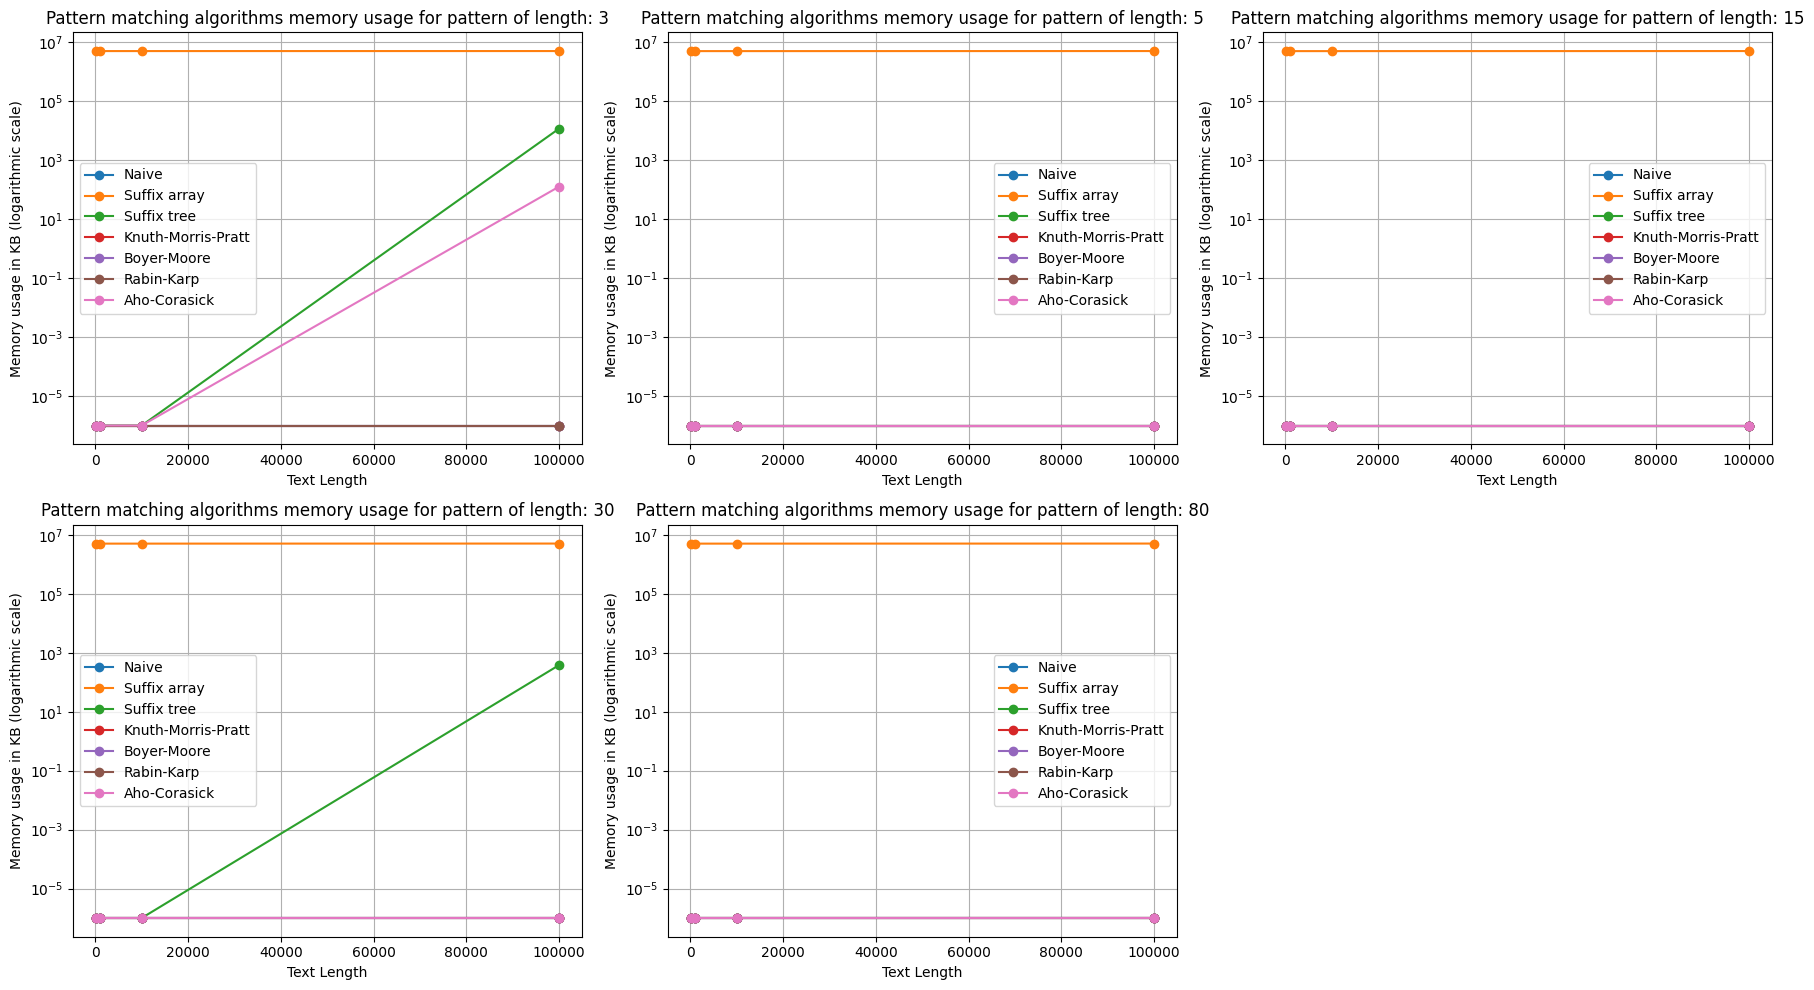

In [17]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Memory usage'].replace(0, 1e-6), marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB (logarithmic scale)')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons

In [18]:
df_comp = pd.Series(dcomp)
df_comp.name = 'Characters comparison'
df_comp.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_comp.unstack()

Pattern Length                      3       5        15       30       80
Algorithm          Text Length                                           
Aho-Corasick       100             198     188      185      171      121
                   1000           1998    1996     1986     1967     1894
                   10000         19952   19992    19915    19929    19879
                   100000       199316  199347   199299   198678   198892
Boyer-Moore        100              37      41       24       34       81
                   1000            353     255      135      111      119
                   10000          3810    2390     1138      774      598
                   100000        38499   24275    12461     8171     5799
Knuth-Morris-Pratt 100             108     102      108      102      100
                   1000           1058    1000     1000     1049     1101
                   10000         10455   10000    10685    10012    10430
                   100000       104356  104964   101114   107615   100130
Naive              100             108     110      109      101      103
                   1000           1058    1000     1000     1055     1137
                   10000         10597   10004    10758    10054    10475
                   100000       105998  105613   101801   108934   101159
Rabin-Karp         100               0      15       15       30       80
                   1000              0       5       15       30       80
                   10000            72      10       30       30       80
                   100000         1026     380      150      300      880
Suffix array       100             168     110      735      930     1440
                   1000            684    1035     3120    19320    30960
                   10000         17223    9925   122220    59580   600320
                   100000       170532  288695  1497570  2782500  1520880
Suffix tree        100               4       7       18       32       83
                   1000              4       6       16       34       85
                   10000             6       6       20       34       85
                   100000            6       9       19       35       84

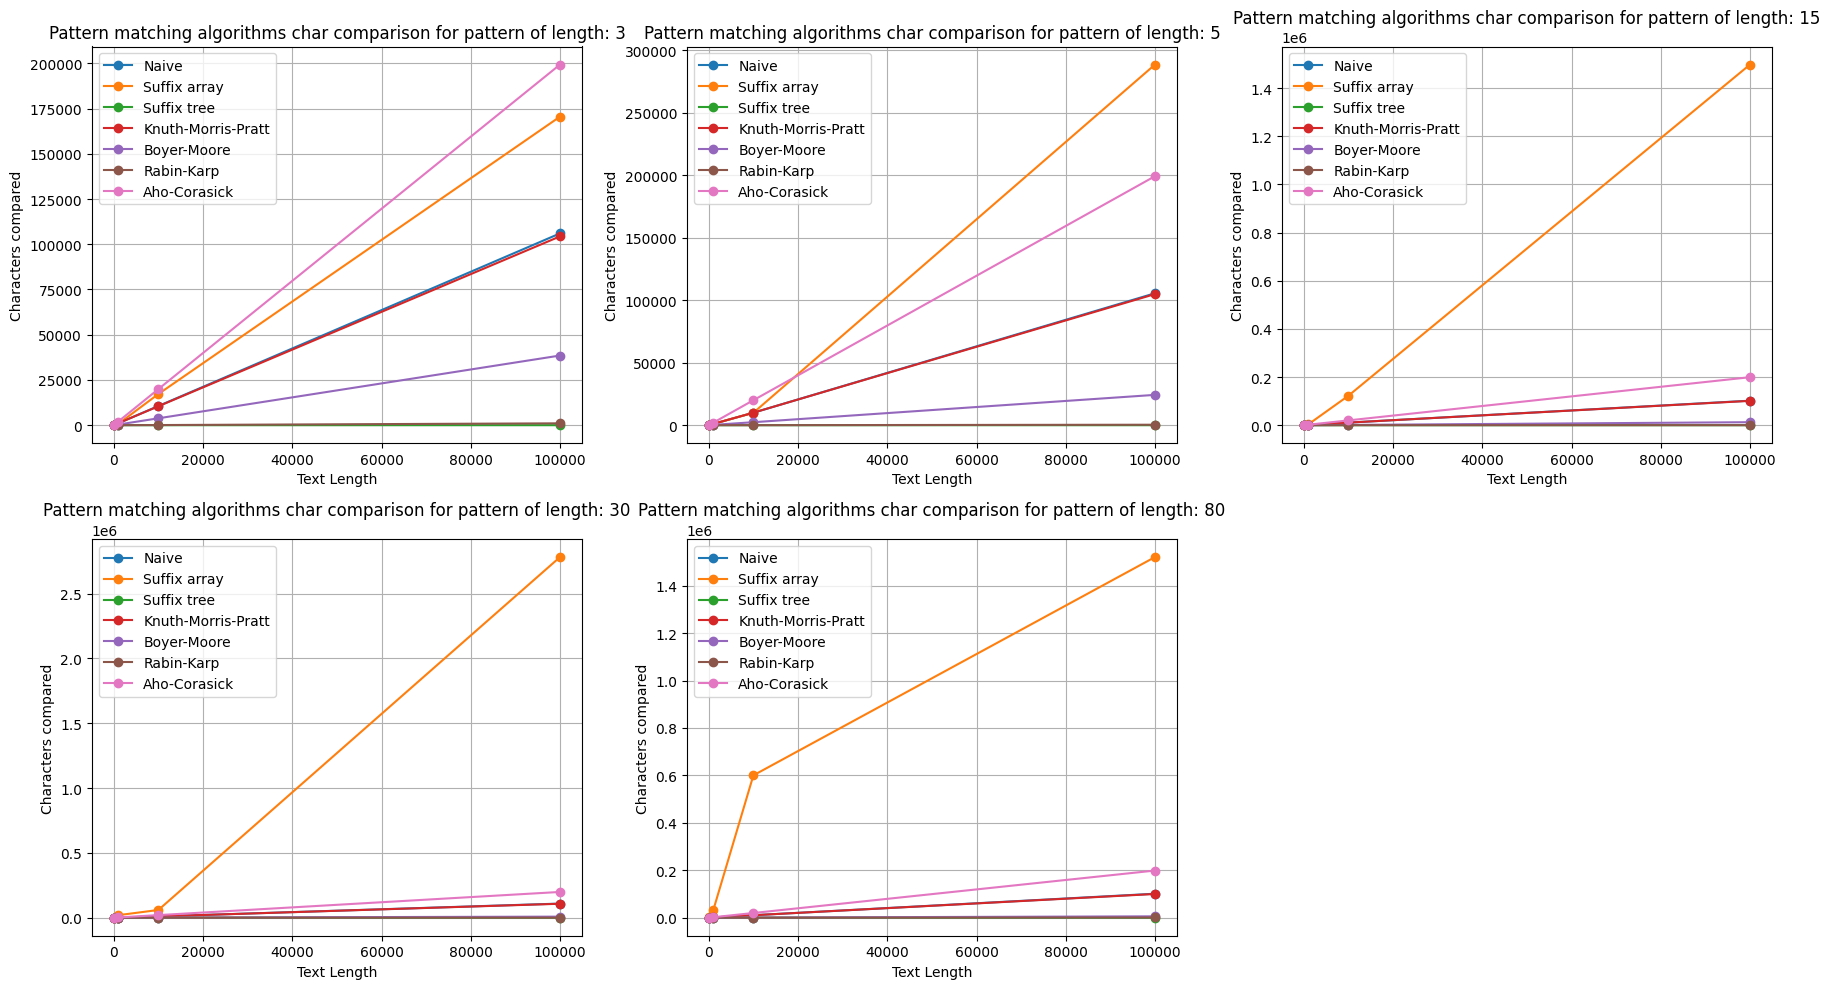

In [19]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

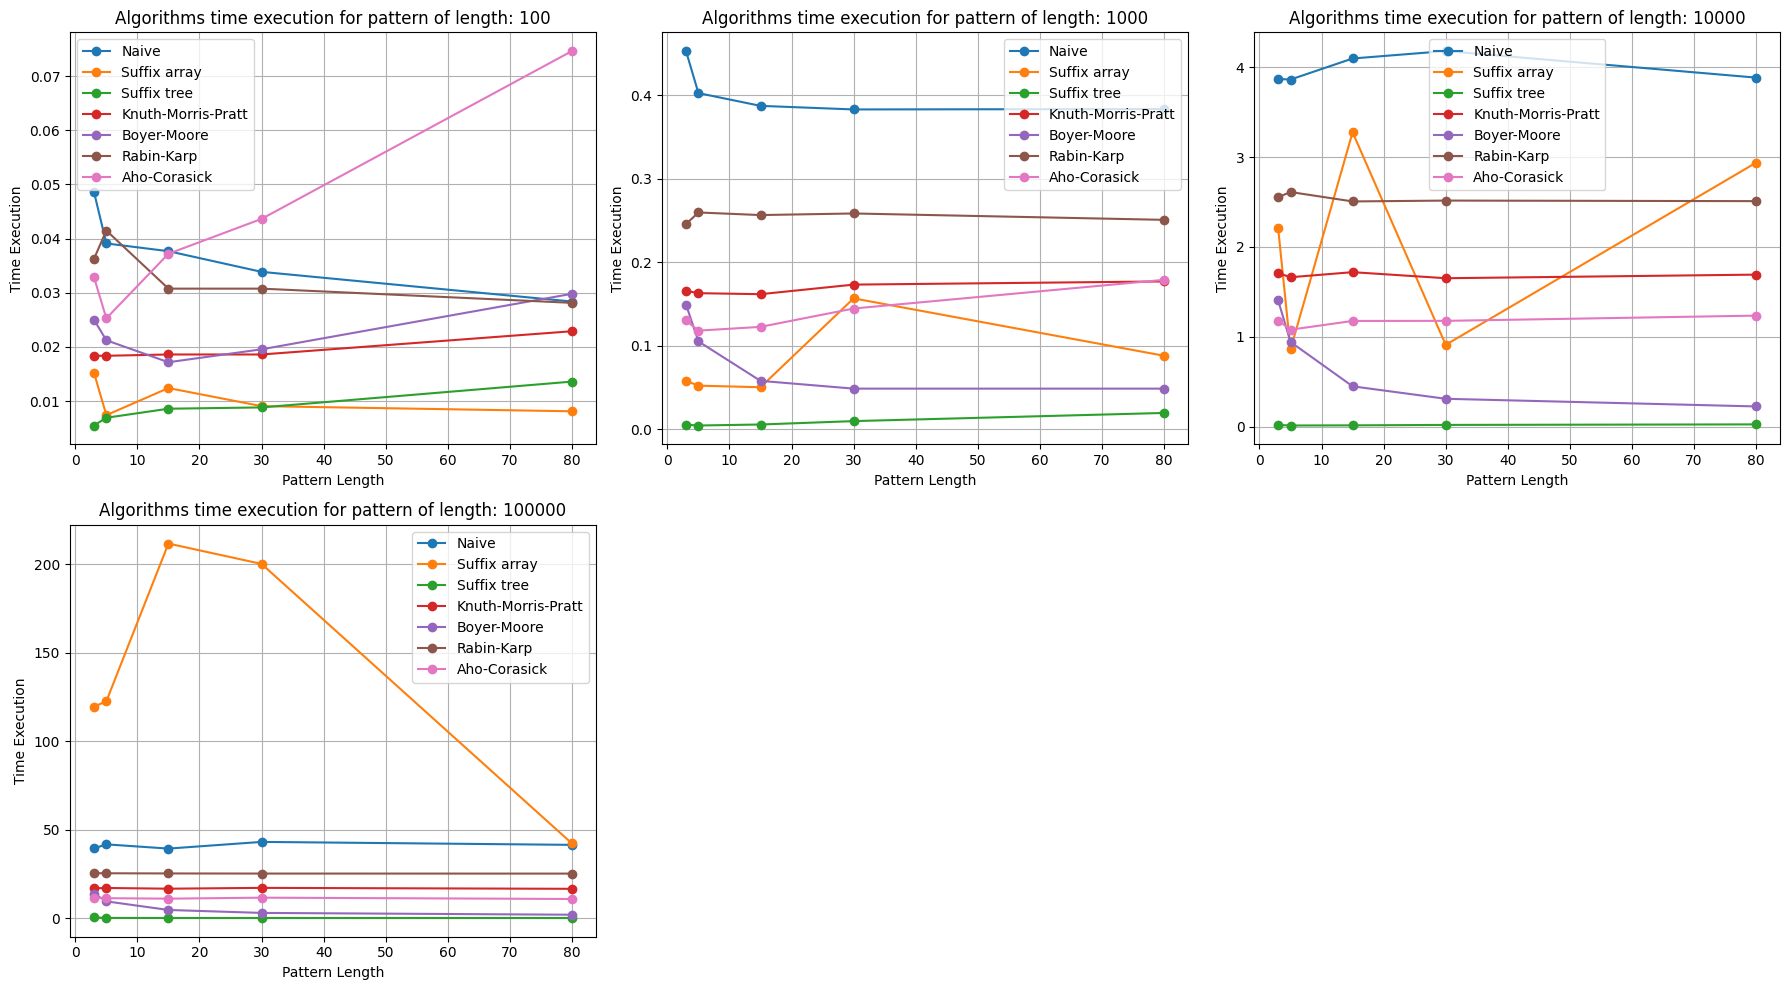

In [27]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()
text_lengths = df_time_reset['Text Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, text_len in enumerate(sorted(text_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Text Length'] == text_len)]
        
        plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Pattern Length')
    plt.ylabel('Time Execution')
    plt.title(f'Algorithms time execution for pattern of length: {text_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Plotting results with more samples

In [ ]:
import random
import numpy as np
import timeit

def randtext(size: int) -> str:
    return "".join( (chr(ord('a') + random.randint(0,25))) for _ in range(size) )

def plt_approximate(ax, xs, ys, deg, label = None, title = None):
    poly = np.poly1d(np.polyfit(xs, ys, deg))
    domain = np.linspace(min(xs), max(xs), 100)

    ax.plot(domain, poly(domain), label = label)
    ax.scatter(xs, ys)
    if label: ax.legend()
    if title: ax.set_title(title)

def time_exec(fun, *data):
    return timeit.timeit(lambda: fun(*data), number=1)

In [ ]:
dtime = dict()
dmem = dict()
dcomp = dict()
sizes_t = np.linspace(10,5e4,10, dtype=int)
sizes_p = np.linspace(10,5e3,5, dtype=int)

for size_t in sizes_t:
    text = randtext(size_t)
    for size_p in sizes_p:
        pattern = randtext(size_p)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, size_t, size_p)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, size_t, size_p)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, size_t, size_p)] = result[algorithm]["compares"]

In [ ]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                10        1257      2505       3752      5000
Algorithm    Text Length                                                   
Aho-Corasick 10           0.036001  2.230406  4.553795   5.287409  5.593061
             5564         0.658035  1.710176  3.244638  89.951277  6.326675
             11118        1.245737  2.187014  3.818750   5.018473  6.417990
             16673        1.969337  3.416061  9.300947  11.488199  8.956432
             22227        2.543211  3.496408  6.126642   7.078409  8.317232
...                            ...       ...       ...        ...       ...
Suffix tree  27782        0.014782  0.014305  0.012159   0.009775  0.016212
             33336        0.013351  0.010014  0.010967   0.014305  0.015259
             38891        0.009060  0.011921  0.010729   0.010252  0.013351
             44445        0.010490  0.010729  0.016689   0.009060  0.015020
             50000        0.011921  0.011444  0.012159   0.010252  0.011206

[70 rows x 5 columns]

### Time execution vs text length

In [ ]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        plt_approximate(ax, subset['Text Length'], subset['Time execution'], deg=2, label=algo)
        # plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage vs text length

In [ ]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        plt_approximate(ax, subset['Text Length'], subset['Memory usage'].replace(0,1e-6), deg=2, label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB (logarithmic scale)')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons vs text length

In [ ]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        plt_approximate(ax, subset['Text Length'], subset['Characters comparison'], deg=2, label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Time execution vs pattern length

In [ ]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()
text_lengths = df_time_reset['Text Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, text_len in enumerate(sorted(text_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Text Length'] == text_len)]
        plt_approximate(ax, pattern_lengths, subset['Time execution'], deg=2, label=algo)
    
    plt.xlabel('Pattern Length')
    plt.ylabel('Time Execution')
    plt.title(f'Algorithms time execution for pattern of length: {text_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()